# Week 1: Machine Learning, Data Matrix, Linear Regression

In our first week, we will take a tour of machine learning, review some linear algebra prerequisites (see the class notes), learn how to represent data as numerical matrices, and learn our first ML method: linear regression models.

# Lecture 1: Outline of ML, Data Matrices, Linear Regression

A machine learning problem generally has three parts

* A task $T$
* A performance measure $P$
* An experience $E$

A computer program learns from experience $E$ with respect to some task $T$ and performance measure $P$ if it improves at task $T$, measured by $P$, with experience $E$. For example,

* **Task**: Identify pictures as having cats or not having cats in them
* **Performance measure**: The proportion of pictures with cats does our computer properly identify
* **Experience**: The computer will be given 500 images with cats and 500 images without cats, each with labels of "cat" or "no cat"

Machine learning tasks are generally too difficult for pre-designed programs to do. Instead, we write programs for computers to learn to solve them. For example, we might want a machine learning algorithm to determine if a picture has a cat in it:

* We **WOULD NOT** give a computer set of instructions to decide how to find cats. (What would the instructions be?!)

* We **WOULD** feed many cat pictures and non-cat pictures to the computer, let label them according to some instructions (usually with some randomly initialized parameters), and give it some instructions for how to tweak its labels, and 

There are many types of tasks. Two large classes of tasks are supervised and unsupervised learning tasks.

* **Supervised learning algorithms** have an experience of observing a dataset of examples *with* labels a correct algorithm would output.

* **Unsupervised learning algorithms** have an experience of observing a dataset *without* labels and seek to learn useful patterns in the dataset.
    
There are some other types of problems, but these groups are most common and the primary focus of this class. Below, we discuss some common tasks in each category. It is not meant to be an exhaustive list but rather a brief outline of what the tasks are, examples of each, and some common methods for attacking these tasks.

It should be noted that machine learning practitioners commonly use multiple methods, build methods customized to their problems, and create pipelines using multiple methods in a specified sequence.

## Supervised Learning

For most supervised learning problems, we have a dataset of $n$ **examples** or **data points**, which can be presented as points in space

$$ x_i=(x_{i1}, ..., x_{id})\in\mathbb{R}^d$$

and we try to predict a function $f:\mathbb{R}^d\to\mathbb{R}^m$ mapping these points $x_i$ to some **label** or **target** $y_i\in\mathbb{R}^m$. Each component of $x_i$ is usually called a **feature** or an **attribute**.

### Regression Problems

In a regression task, the learning algorithm tries to predict a numerical $m$-vector output given an $d$-dimensional input example--e.g. to estimate a function $f:\mathbb{R}^d\to\mathbb{R}^m$.

An example is predicting the price for which a house will sell given information on the house--the number of bedrooms, the number of bathrooms, the floorspace, the size of the surrounding yard, whether or not it has a pool, etc. Here, as in many of the problems we will cover, $m=1$, meaning we will predict only one output variable.

Common methods for regression include linear regression, ridge and LASSO regression, decision trees, random forests, and support vector machines--all of which will be covered in this course--as well as neural networks, which are beyond the scope of this course.

### Classification Problems

In a classification task, the learning algorithm tries to predict which of $k$ disjoint categories a datapoint belongs to--e.g. to estimate a function $f:\mathbb{R}^d\to\{c_1, ..., c_k\}$.

Identifying pictures of cats is an example of this problem: the categories are "cat" and "not cat," which are mutually exclusive. (Keep in mind an image is stored in a computer as a numerical value representing the intensity of red, blue, and green colors in each pixel of the image, which may easily be stored as a very high-dimensional point.)

Common methods for classification include logistic regresion, $k$-nearest neighbors, the Bayes and naive Bayes classifiers, discriminant analysis (LDA and QDA), decision trees, random forests, and support vector machines--all of which will be covered in this course--as well as neural networks, which are beyond the scope of this course.

## Unsupervised Learning

In unsupervised learning, we do not have the benefit of knowing some of the results we need to find. It is usually a somewhat less structured search for useful patterns in a dataset.

### Clustering Problems

A clustering task is one that tries to find which datapoints are similar to one another, in some sense that we do not necessarily define in advance.

Common methods for clustering are K-means, hierarchical clustering, Gaussian mixtures, and density-based clustering--which we will cover in the course--as well as self-organizing maps, which are beyond the scope of this course.

### Dimensionality Reduction

In a dimensionality reduction task, the goal is to represent a dataset using fewer features without obscuring useful patterns in the data.

For example, if we have a 1-megapixel color picture as a datapoint, it would have 1 million pixels and we would store three numbers (R, G, and B values) for each pixel, meaning the dimension of the image would be 3 million. It is sometimes far too slow to use datapoints in $\mathbb{R}^{3000000}$ in machine learning algorithms. It is frequently helpful to find ways to store datapoints in lower-dimensional spaces such that important information is not lost. The idea is similar to compression.

Common methods for dimensionality reduction are principal components analysis (PCA), multidimensional scaling (MDS), and $t$-stochastic neighbors embedding ($t$-SNE)--which we will cover in the course--as well as autoencoders and word embeddings, which are beyond the scope of this course.

### Anomaly Detection

In an anomaly detection task, the goal is to find unusual patterns in data.

An example is credit card companies trying to detect unusual usage of a credit card. If they can detect unusual activity, they sometimes deactive credit cards to avoid fraud. False positives may cause problems for legitimate customers, but cards deactivated due to actual fraud can prevent further damage. 

### Denoising

In denoising, the goal is to uncover some original dataset that has been corrupted by some sort of noise, whether we mean noisy sounds or random error. In all cases, the goal is to find a sometimes-faint signal within some noise.

Denoising is not a task we will cover explicitly in the course.

Examples:

* If you are speaking into a phone while riding in a car, the road noise can cause the voice signal not to be transmitted clearly
* Noise-cancelling headphones try to counteract noise to pass through clear audio
* Random errors in measurements in particle physics make the signal difficult to extract
* Financial instruments like stocks can fluctuate at random while there is an underlying cause of general trends

## Data Matrix

In this section, we will cover how data is frequently stored such that it can be used by machine learning methods. It should not be thought that this is the only way or always the best way to store data, but it will be a series of conventions used in many fields.

For many problems, we will have a **dataset** consisting of some number $n$ points in $\mathbb{R}^d$ that we will store in a matrix

$$
X = \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \cdots & x_{nd}
\end{pmatrix}
$$

The $i$th *row* $x_i = (x_{i1}, x_{i2}, ..., x_{id})\in\mathbb{R}^d$ is the $i$th point in the dataset. These points have many names in different fields: **points, datapoints, examples, vectors, records, feature-vectors**. In some sources, these points $x_i$ are denoted $\mathbf{x}_i$, but it should be clear that $x$ with a single subscripts indicates a point while $x$ with two subscripts is the component of a point.

The $j$th *column* $X_j=(x_{1j}, x_{2j}, ..., x_{nj})\in\mathbb{R}^n$ is the $j$th component of each point in the dataset. These are likewise called by many names dependent on field: **features, attributes, variables, dimensions, properties, fields**. In some cases, each column can be considered a random sample of a random variable, or the rows of the matrix $X$ can be considered a random sample of vector-valued random variables.

The number of points $n$ is the **size** of the dataset and the length of the points $d$ is called the **dimensionality** of the dataset.

### Data Representation Examples


* If we have a dataset of sounds of people speaking along with transcripts of the words, we might want to classify the words spoken into a microphone. (Think Siri!)

In all of these cases, the information can be represented as a point in the $n$-dimensional real space.

* Suppose we have a dataset of medical records where each datapoint contains details for one patient in the image below. Here, a datapoint for a single patient might be stored in the 9D space $\mathbb{R}^9$ as below, where each component with a question mark is stored as a binary digit.

$$(male?, female?, age, weight, height, smoker?, white?, black?, asian?)$$

<center><img src="images/medicalRecords.png" /></center>

* Suppose we have a dataset of labeled color images of cat and dogs. Images are typically represented by three channels, meaning three numbers for each pixel (the red, green, and blue levels), like the bird picture below. Each channel is stored as matrix of intensities, as in the picture of the dog and cat below. Although it may seem awkward, we can reshape this data into a giant vector.

<center><img src="images/dogcat.png" /></center>

<center><img src="images/birdRGB.png" /></center>

* If we have a dataset of audio files, each of which is a clip of a jazz, classical, rock, pop, or hip-hop song, the audio files might have several numbers describing the individual sounds for the song sampled many times per second. This, too, can be reshaped into a vector.

<center><img src="images/audioFile.png" /></center>

* The audio files might have numbers specifying the type of sound for a word many times per second. The blue lines indicate the beginning of a word and the red lines indicate the ends of words.

<center><img src="images/audioWords.png" /></center>

* If we have a dataset of traffic logs on a network, some known to be infected by a specific virus and some are not, we might store this information to try to classify which logs are likely infected. The network traffic logs might have numbers of packets transferred, file size, ports, addresses, the content of the packets, etc., at each moment in time, which may be reshaped into a vector.


In all mature applications, we should expect preprocessing steps to be done to raw data before ML can be effectively used to solve supervised or unsupervised problems.

I chose these applications to demonstrate two things: (1) ML problems are interesting and useful in almost every area of study and (2) a huge class of problems have much in common mathematically. All apply to datapoints, although some types of data may have far more dimensions than others--a medical record may only have 9 numbers, but a 12-megapixel photo from the latest iPhone would have $4,000\times 3,000\times 3=36,000,000$ numbers, 3 for each pixel).

## Linear Regression

**Regression problems** are problems where we try to predict a numerical output value given some input datapoint based on some examples ($x_i$, $y_i$) of input datapoints with known outputs or **targets**. This will be the task of the machine learning problem.

### Examples

1. If we have a dataset of workers in a certain position of numbers of years of experience as an input and salary, we might want to predict salaries we don't know based on the years of experience a person has.

1. If we have a dataset of variables about houses (floorspace, number of bedrooms, number of bathrooms, number of stories, age of the house) along with their selling prices, we might want to predict selling prices of homes not in the dataset based on the other variables about the house.

1. If we have a dataset of variables about countries (average salary, average education of citizens, death rate, birth rate, infant mortality rate, etc.) along with their GDP, we might want to predict the GDP of countires not in the dataset based on the other variables about the country.

1. If we have a dataset of seasonal variables about NBA basketball teams (points per game, turnovers per game, point differential, rebounds per game, blocks per game, etc.) and the numbers of wins they had in different seasons, we might want to take the statistics of a team early in a season to try to predict the number of wins they will have and average number of points per game.

### Types of Regression Problems

There are different types of regression problems based on the numbers of input variables and output variables.

* A **simple** regression problem predicts an output variable with just one input variable, as in example 1.

* A **multiple** regression problem predicts an output variable with more than one input variable as in examples 2 and 3.

* A **multivariate** regression problem predicts more than one output variables as in example 4.

### The Math of a Regression Problem

All of these regression problems have some things in common: there are example datapoints with outputs and we want to predict the outputs for new datapoints. Consider a $d$-dimensional point, or vector, $x_i\in\mathbb{R}^d$ and denote $x_i=(x_{i1},x_{i2},...,x_{id})$. $x_i$ maps to an output $y_i\in\mathbb{R}^m$. (In statistics, the components of the vector $x_1$ are more frequently called **predictors** or **independent variables** and the $y_i$ values are more frequently called **responses** or **dependent variables**.)

In a perfect world, a solution to a (univariate) regression problem will find a function $\hat{f}:\mathbb{R}^d\to\mathbb{R}$ that can do two things:

1. Mapping each example $x_i$ in a dataset to its output $y_i=\hat{f}(x_i)$
1. Generalize to successfully predict outputs of new datapoints

In reality, $\hat{f}$ will not always map each input $x_i$ values to each $y_i$ value perfectly or generalize to new inputs well, but we try to get as close to these ideals as possible.

### Regression Algorithms

There are a number of popular approaches to regression problems, including the following.

* linear regression
* structured regression
* radial basis function networks
* ridge and LASSO regression
* decision trees
* random forests
* support vector machines
* neural networks

In the near term, we will consider the first four approaches as they work in relatively similar ways. As an added bonus, they all *can* use a numerical optimization scheme called gradient descent, which is one of the most highly-used algorithms of machine learning.

**Note**: some of the methods can be easily solved explicitly rather than resorting to numerical optimization.

Later in the term, we will focus on trees, forests, and SVMs, but neural networks are outside the scope of the course.

### Linear Model

We will assume the function $\hat{f}$ we will predict is linear in some parameters $\theta_0,...,\theta_d$ so that our predicted function will be

$$
\hat{f}(x_i)=\theta_0 + \sum\limits_{k=1}^d \theta_k x_{ik}=\theta_0+\theta_1 x_{i1}+\cdots+\theta_d x_{id}=(1, x_{i1}, \dots, x_{id})\cdot(\theta_0, \theta_1, \dots, \theta_d)
$$

for some parameters $\theta_0,...,\theta_d$. More succinctly, we will write

$$
\hat{f}(x_i)=x_i^T\theta
$$

Here, we assume the output $Y$ is a random variable of the form

$$Y = \hat{f}(X_1, ..., X_d) + \varepsilon$$

where $\varepsilon$ is a random error term that is assumed to account for the effect of unknown latent variables and intrinsic randomness of $y$.

We will aim to choose the values of $\theta_0,...,\theta_d$ that will minimize a loss function on a training dataset $(x_1,y_1),...,(x_n,y_n)$. This loss function will be small if each $\hat{f}(x_i)$ is near each $y_i$, which is what we want.

#### Note

It is a common misconception that "linear regression" must fit linear functions with respect to data. However, but the "linear" part of linear regression refers to the fact that $f$ is linear with respect to $\theta_0,...,\theta_d$, not with respect to $x_i$, so it is certainly possible to apply some preprocessing to the datapoints, which in effect, fits a nonlinear surface.

### Ordinary Least Squares

Recall that we have a labeled dataset $(x_1,y_1)$, ..., $(x_n,y_n)$ with each $x_i\in\mathbb{R}^d$ and each $y_i\in\mathbb{R}$ and our goal is to find a function $\hat{f}$ that maps the $x_i$'s to the $y_i$'s as well as possible, and, we hope, is effective at mapping unknown datapoints to appropriate outputs.

In the **ordinary least squares** method, we try to minimize a the **sum of squared differences** between the real outputs $y_1, ..., y_n$ and the predicted outputs $\hat{f}(x_1)$, ..., $\hat{f}(x_n)$. In other words, the loss function in this method is

$$L(\theta)=\sum\limits_{i=1}^n \left(\hat{f}(x_i)-y_i\right)^2 = \sum\limits_{i=1}^n \left(x_i^T\theta-y_i\right)^2=\|X\theta-y\|^2$$

which measures the error, where

$$
X=\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1d}\\
1 & x_{21} & x_{22} & \cdots & x_{2d}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & x_{n2} & \cdots & x_{nd}
\end{pmatrix}
\hspace{2cm}y=\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
\hspace{2cm}\theta=\begin{pmatrix}
\theta_0 \\ \theta_1 \\ \vdots \\ \theta_d
\end{pmatrix}
$$

This matrix is the data matrix, except we added a column of ones to the left for convenience.

The ordinary least squares problem aims to solve the optimization problem

$$
\min\limits_{\theta\in\mathbb{R}^{d+1}} L(\theta)=\min\limits_{\theta\in\mathbb{R}^{d+1}}\|X\theta-y\|^2
$$

Here, $X$ and $y$ are constants derived from the dataset, so the $\theta$ values are the only unknowns, so we need to find the $\theta$ values that minimize the loss function $L$. We should note that these $\theta$ values are called **parameters** of the model, which are values that are estimated by the model automatically from the data.

It turns out, we can actually solve this optimization explicitly under a minor assumption that the columns of the data are linearly independent, so let's solve it. In multivariate calculus, the approach to minimize a differentiable function with unbounded domain is to take derivatives with respect to $\theta_0, ..., \theta_d$, set them all equal to zero, solve simultaneously, and compare the function at these critical values. The OLS problem has a mathematical property called convexity, meaning it has a unique solution, which will occur at the critical point.

Before we take derivatives, let's convert the loss function into a more convenient form. First,

$$L(\theta)=\|X\theta-y\|^2_2=(X\theta-y)^T(X\theta-y),$$

where the $T$ subscript represents the **transpose** of a matrix. Distributing the transpose,

$$L(\theta)=((X\theta)^T-y^T)(X\theta-y).$$

Using the distributive property of matrix multiplication,

$$L(\theta)=(X\theta)^T X\theta-(X\theta)^T y-y^T X\theta+y^T y$$

If we realize $y$ and $X\theta$ are both matrices of shape $n\times 1$, then we should have $(X\theta)^T y=y^T X\theta$, so the loss function is

$$L(\theta)=(X\theta)^T X\theta-2(X\theta)^T y+y^T y$$

Since $(AB)^T=B^TA^T$ for matrices, we can simplify the terms as

$$L(\theta)=\theta^T X^T X\theta-2\theta^T X^T y+y^T y$$

Now, of course, this is a scalar (because, in the end, the loss is just a number--the sum of squared errors), so we can take the derivatives with respect to $\theta_1$, ..., $\theta_d$ and create the gradient vector:

$$\nabla L(\theta)=2X^T X\theta-2X^T y$$

As in multivariate calculus, we set this whole vector equal to 0 and solve for the estimated version of $\theta$ as

$$
\begin{align*}
2X^T X\theta-2X^T y &= 0\\
X^T X\theta &= X^T y.
\end{align*}
$$

Then, if $X^T X$ is an invertible matrix, then we can left-multiply both sides of the equation by its inverse to solve for $\theta$

$$
\begin{align*}
(X^T X)^{-1}(X^T X\theta) &= (X^T X)^{-1}X^T y\\
\theta &=(X^T X)^{-1}X^T y.
\end{align*}
$$

At long last, we have a formula for the exact solution for the $\theta$ values that minimize the loss function.

#### Linear Algebra Notes

* The formula above holds only if the inverse of the matrix $X^T X$ exists. Assuming $n\geq d$, the inverse exists when the columns of $X$ are linearly independent. (See <a href="https://www.khanacademy.org/math/linear-algebra/matrix-transformations/matrix-transpose/v/lin-alg-showing-that-a-transpose-x-a-is-invertible">this video</a> or pretty much any linear algebra book.)

* If you have studied linear algebra, you might recognize $(X^T X)^{-1}X^T$ is the <a href="https://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html">Moore-Penrose pseudoinverse</a> of $X$.

Anyway, the formula for $\theta$ does not look so nice to do by hand since it requires a matrix multiplication, a matrix inverse, and two more matrix multiplications, but a computer can complete these tasks quickly. (The <a href="https://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html">best algorithms</a> for matrix multiplication and matrix inverses for $n\times n$ matrices each have computational complexity less than $O(n^{2.5})$, so doing a few of these is no problem, even for quite large matrices.)

# Lecture 2: Implementing Linear Regression

## Ordinary Least Squares Code

Before we write some code for ordinary least squares, let's import some libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Let's create a class for using ordinary least squares in this way to fit the model and to predict outputs for unknown inputs. We will use the scikit-learn pattern.

In [2]:
class OrdinaryLeastSquares:
        
    # fit the model to the data
    def fit(self, X, y):
        # save the training data
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the theta values that minimize the sum of squared errors
        X = self.data
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
                
    # predict the output from input (testing) data
    def predict(self, X):
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return the outputs
        return X @ self.theta

## Training and Testing a Regression Model

If we have a dataset of labeled data, a very common approach is to randomly split the dataset into two parts: the training set and the testing set. We remove the labels from the test set, "train" the model with the training set, use the resulting model to attempt to make predictions for the test set, and then measure performance.

There are no strict rules here, but it is common to use 60\% train 40\% test, although folks like Andrew Ng have argued that a much smaller test sets are reasonable if the dataset is very large--e.g. datasets with millions of datapoints are not uncommon in some fields. This way, we can measure the success of our regression model on data it has never seen (the testing set). Once we become confident our model works well in this way, we can be more confident that it will **generalize** well in the real world.

My preferred approach is to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> function from the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection">scikit-learn.model_selection</a> library to randomly assign a specified percentage (usually 50-75%) of the dataset to the training set and the rest in the test set.

### Hyperparameters and Dev Sets

In some models, there are **hyperparameters** to tune. These are settings the user specifies before running the algorithms which may have an impact on performance. In this case, the test set is frequently split in half into "dev" and "test" sets. The dev set is used for tuning the hyperparameters before testing the model on unknown test sets. More on that later.

## Performance Metrics for Regression

Let's consider a few performance metrics in common usage for regression.

With linear regression, we generally have the unfortunate situation that the model we construct is not perfect even on the training set. Therefore, we first need to consider the performance on the training data to which it was fit just to see how well the model fits to the training data. The formulas for the common metrics are not particularly interesting, so we just state what they represent and what value they should ideally have:

* **Coefficient of determination** $R^2$ - the fraction of the variation in the data explained by the model. It is, in a sense, a measure of the strength of the linear relationship between the variables. Ideally, it will be near 1.

* **Sum of squared error (SSE)** - the loss function we have used. Ideally, it will be as small as possible.

* **Mean squared error (MSE)** is simply the SSE divided by the number of examples we test. It is frequently better because it makes little sense to measure success in a way that is so depedent on the dataset size. Ideally, it should of course be small.

* **Mean absolute error (MAE)** - the mean of the absolute errors between the points and the fitted function. Ideally, it will be as small as possible.

If these values are far from their ideal values for the training set, the model does not even fit the training data well, so it probably will not fit the testing data well. The ordinary least squares solution finds the optimal parameters for a linear fit, so poor performance on the training set means the data do not have a strong linear relationship.

Some preprocessing of the data might make it work better. For example, you can apply a logarithm to a variable if there's a linear relationship with that variable on a log scale. See the (free) classic book <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">*Elements of Statistical Learning*</a> by Hastie, et. al., section 2.6.3 for an introduction on linear basis expansions.

Second, we need to consider the performance on the testing data. We generally should consider the MSE or MAE.

## 1D Example

Let's make up some 1D data and test the method.

The predicted y values are [1.2 1.9 2.6 3.3 4. ]
The real y values are [1 2 3 3 4]
The theta values are [-3.   0.7]
The r^2 score is 0.9423076923076923
The mean squared error is 0.060000000000000074
The mean absolute error is 0.20000000000000212


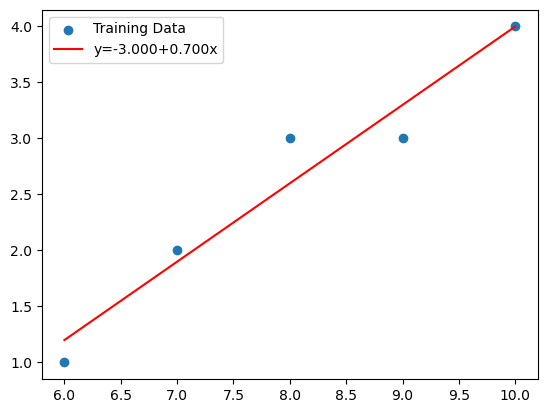

In [4]:
X = np.array([[6], [7], [8], [9], [10]])
y = np.array([1, 2, 3, 3, 4])

model = OrdinaryLeastSquares()
model.fit(X,y)
predictions = model.predict(X)

# print the predictions
print('The predicted y values are', predictions)

# print the real y values
print('The real y values are', y)

# print the theta values
parameters = model.theta
print('The theta values are', parameters)

# plot the training points
plt.scatter(X, y, label = 'Training Data')

# plot the fitted model with the training data
xModel = np.linspace(6,10,100)
yModel = parameters[0] + parameters[1]*xModel
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])
plt.plot(xModel, yModel, 'r', label = lineFormula)

# add a legend
plt.legend()

# return quality metrics
print('The r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions))

## 2D Example

Let's make up some 2D data and test to see if our method works well.

In [7]:
trainX = np.array([[2, 2], [2, 3], [5, 6], [6, 7], [9, 10]])
trainY = np.array([3, 13, 19, 29, 35])

testX = np.array([[2, 1], [4, 5], [6, 5], [8, 9]])
testY = np.array([9, 15, 25, 31])

# instantiate an OLS model
model = OrdinaryLeastSquares()

# fit the model to the training data (find the theta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', predictions.T[0])

# print the real y values
print('The real y values for the test set are', testY)

# print the theta values
print('The theta values are', model.theta)

# print quality metrics
print('The mean squared error on the .is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

The r^2 score is 0.9642679900744415
The mean squared error on the training set is 4.608000000000017
The mean absolute error on the training set is 1.5360000000000298
The predicted y values for the test set are -6.520000000000394
The real y values for the test set are [ 9 15 25 31]
The theta values are [-3.56 -6.24  9.52]
The mean squared error on the .is 149.3792000000069
The mean absolute error on the test set is 9.799999999999962


For a low dimensional problem like this one, we can plot the points along with the function $f$.

Text(0.5, 0, 'y')

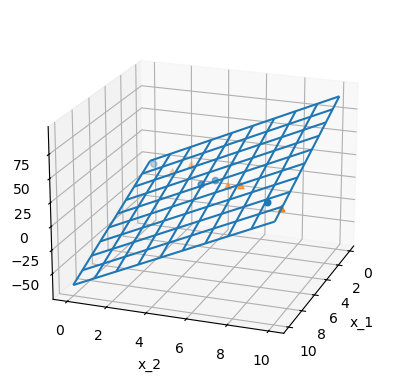

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# scatter plot of the test data
x1 = testX[:,0]
x2 = testX[:,1]
y = testY
ax.scatter(x1, x2, y, marker = 'o')

# scatter plot of the training data
x1 = trainX[:,0]
x2 = trainX[:,1]
y = trainY
ax.scatter(x1, x2, y, marker = '^')

# plot the plane we fit to the data
theta = model.theta

# surface plot
x1 = np.linspace(0,10,10)
x2 = np.linspace(0,10,10)

X1, X2 = np.meshgrid(x1,x2)
Y = theta[0] + theta[1]*X1 + theta[2]*X2

surf = ax.plot_wireframe(X1, X2, Y)
ax.view_init(20, 20)

# add axis labels
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

## Example: High School Graduation Rates in US States

Let's try to use ordinary least squares on a real dataset. The CSV file in '/data/US_State_data.csv' contains data from each U.S. state.

We would like to predict the output variable included, the high school graduation rate, from some input variables: including the crime rate (per 100,000 persons), the violent crime rate (per 100,000 persons), average teacher salary, student-to-teacher ratio, education expenditure per student, population density, and median household income.

This means we have 50 examples (one for each state), 7 input (predictor) variables, and one output (response) variable. In order to use the formula we derived above to attack the problem with ordinary least squares, we need to find the matrices $X$ and $y$.

In [10]:
# import the data from the csv file to an numpy array
data = pd.read_csv('../data/US_State_Data.csv', sep=',').to_numpy()

# select the data and the labels
X = np.array(data[:,1:8], dtype=float)
y = np.array(data[:,8], dtype=float)

# split the data into training and test sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 1)

# run the model (same code as above)

# instantiate an OLS model
model = OrdinaryLeastSquares()

# fit the model to the training data (find the theta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', np.round(predictions.T[0],0))

# print the real y values
print('The real y values for the test set are     ', testY)

# print the theta values
print('The theta values are', model.theta)

# print quality metrics
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

The r^2 score is 0.4035248263372677
The mean squared error on the training set is 19.231858411594597
The mean absolute error on the training set is 3.667142668249196
The predicted y values for the test set are 81.0
The real y values for the test set are      [70. 83. 83. 81. 76. 87. 89. 89. 78. 78. 84. 80. 79.]
The theta values are [ 1.13013011e+02 -6.03346210e-03  6.08210993e-03 -2.31029129e-04
 -2.66944638e-01 -4.46787015e-04  1.04141591e-02  8.22209664e-05]
The mean squared error on the test set is 26.74145509811607
The mean absolute error on the test set is 4.380721146014892
